In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

#### Load CSV files

In [2]:
covid_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('vaccine_with_protocol.csv')

#### Convert Values

In [3]:
covid_df.Zip = covid_df.Zip.astype('Int64')
vaccine_df.zipcode = vaccine_df.zipcode.astype('Int64')
vaccine_df.count_given = vaccine_df.count_given.astype('float')
vaccine_df.dose_nbr = vaccine_df.dose_nbr.astype('Int64')

In [4]:
covid_df.Zip = covid_df.Zip.astype('str')
vaccine_df.zipcode = vaccine_df.zipcode.astype('str')

#### Rename Columns

In [5]:
covid_df.columns = ['date', 'zip', 'cases']
vaccine_df.columns = ['date', 'zip', 'vacc', 'dose_nbr', 'protocol']

#### Convert DateTime

In [6]:
covid_df.date = pd.to_datetime(covid_df.date)
vaccine_df.date = pd.to_datetime(vaccine_df.date)

#### Filter Out Second Vaccine Doses

In [7]:
vaccine_df = vaccine_df[vaccine_df['dose_nbr'] == 1].reset_index()

In [8]:
# vaccine_df

#### Group Total Covid and Total Vaccine Count By Zip

#group by zipcode to get total cases per zipcode
df2 = C_count.groupby(['Zip'],as_index=False)['Cases'].sum()
df2

In [9]:
covid_df_g = covid_df.groupby(['zip'], as_index=False)['cases'].sum()
vaccine_df_g = vaccine_df.groupby(['zip'], as_index=False)['vacc'].sum()

In [10]:
covid_df_g.cases.sum()

93619

In [11]:
vaccine_df_g.vacc.sum()

220038.0

#### Drop Null Zips And Rename DF

In [12]:
# covid_df_g.tail()

In [13]:
# vaccine_df_g.tail()

In [14]:
covid_zip_perc = covid_df_g.drop([30,31])
vaccine_zip_perc = vaccine_df_g.drop([30,31])

In [15]:
# covid_zip_perc.tail()

In [16]:
# vaccine_zip_perc.tail()

#### Merging Covid By Zip and Vaccine By Zip

In [17]:
c_v_zip = pd.merge(covid_zip_perc, vaccine_zip_perc, how='inner', on='zip')

#### Percentage of COVID By Zip and Percentage of Vaccines By Zip


In [18]:
# covid_zip_perc['total_cases'] = covid_zip_perc.cases.sum()
covid_zip_perc['perc_cases'] = covid_zip_perc.cases / covid_zip_perc.cases.sum()
covid_zip_perc = covid_zip_perc.sort_values('perc_cases', ascending = False)
# covid_zip_perc = covid_zip_perc.style.format({'perc_cases': "{:.3%}"})

In [19]:
# c_v_zip['perc_cases'] = round(c_v_zip.cases / c_v_zip.cases.sum() * 100,2)
# c_v_zip['perc_v'] = round(c_v_zip.v_count / c_v_zip.v_count.sum() * 100, 2)

In [20]:
# covid_zip_perc.head()

In [21]:
# c_v_zip.head()

#### Create Month_Year Column

In [22]:
vaccine_df2 = vaccine_df
covid_df2 = covid_df

In [23]:
vaccine_df2['month'] = vaccine_df2['date'].dt.month
vaccine_df2['year'] = vaccine_df2['date'].dt.year
covid_df2['month'] = covid_df2['date'].dt.month
covid_df2['year'] = covid_df2['date'].dt.year

In [24]:
vaccine_df2['month_year'] = vaccine_df2['month'].map(str) + '-' + vaccine_df2['year'].map(str)
covid_df2['month_year'] = covid_df2['month'].map(str) + '-' + covid_df2['year'].map(str)

In [25]:
covid_df = covid_df[['zip', 'month_year', 'cases']]
vaccine_df = vaccine_df[['month_year', 'zip', 'vacc', 'dose_nbr', 'protocol']]

In [26]:
v_my_g = vaccine_df2.groupby(['zip'])
c_my_g = covid_df2.groupby(['zip'])

#### Load Household Income

Read in Excel file and then skip the first row which is a title in the excel file
Skip rows allows that. We are then pulling in two headers since this excel has Zip and 'Value & Error'
We can choose different excel sheets Sheet_name = 0 is actual data and Sheet_name =1 is the second percentage

In [27]:
income_df = pd.read_excel("household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_df = income_df[income_df.columns.drop(list(income_df.filter(regex='Error')))]
income_df.columns = income_df.columns.droplevel(1)

In [28]:
income_clean=income_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [29]:
# income_clean.info()

#### Load Sex_Age Data

In [30]:
sex_age_df = pd.read_excel("sex_by_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
sex_age_df = sex_age_df[sex_age_df.columns.drop(list(sex_age_df.filter(regex='Error')))]
sex_age_df.columns = sex_age_df.columns.droplevel(1)

In [31]:
sex_age_clean = sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [32]:
# sex_age_clean

In [33]:
# sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index()

#### Load Ethnicity Data

In [34]:
ethnicity_df = pd.read_excel("ethnicity.xlsx", skiprows = 1, header=[0,1], sheet_name=0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)

In [35]:
ethnicity_df_clean = ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [36]:
# ethnicity_df_clean

In [37]:
# ethnicity_df_clean.nunique(axis=0)

#### Total Population From Ethnicity DF

In [38]:
pop_by_zip = ethnicity_df_clean[['zip', 'Total:']]
pop_by_zip = pop_by_zip.rename(columns={'Total:': 'total'})

In [39]:
pop_by_zip

Unnamed: 0_level_0,zip,total
0,37010,4966
1,37012,2185
2,37013,97939
3,37014,2835
4,37015,17665
...,...,...
113,38552,157
114,38560,1405
115,38563,3410
116,38567,685


#### Merge COVID DF to Ethnicity DF

In [40]:
perc_covid = pd.merge(covid_df_g, pop_by_zip, how='inner', on='zip')

In [41]:
perc_covid['perc'] = perc_covid.cases / perc_covid.total
perc_covid.rename(columns = {'total': 'pop_total'}, inplace = True)
perc_covid = perc_covid.sort_values('perc', ascending = False)
# perc_covid = perc_covid.style.format({'perc': "{:.3%}"})

In [42]:
perc_covid['perc_of_pop'] = perc_covid.pop_total / perc_covid.pop_total.sum() * 100

In [43]:
perc_covid = perc_covid.sort_values('perc', ascending = False)

In [44]:
perc_covid.head()
# perc_covid[perc_covid['zip'] == '37214']

,zip,cases,pop_total,perc,perc_of_pop
20,37213,65,95,0.684211,0.012169
26,37219,270,1154,0.233969,0.147825
10,37203,3346,15091,0.221722,1.933120
29,37228,310,1615,0.191950,0.206878
9,37201,299,1619,0.184682,0.207390


In [45]:
# Zipcodes with Highest Perc / Breakdown

# 37213 - Industrial Corridor
# 37219 - Downtown
# 37203 - Gulch/Westend
# 37228 - Metrocenter
# 37201 - Downtown
# 37013 - Antioch

In [46]:
# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(perc_covid['perc_of_pop'],perc_covid['cases'], color='hotpink')

#### Merge COVID/Vaccine DF to Ethnicity DF

In [47]:
c_v_pop_zip = pd.merge(c_v_zip, pop_by_zip, how='inner', on='zip')
c_v_pop_zip.rename(columns = {'total': 'pop_total'}, inplace = True)
c_v_pop_zip['perc_cases'] = round(c_v_pop_zip.cases / c_v_pop_zip.cases.sum() * 100,2)
c_v_pop_zip['perc_vacc'] = round(c_v_pop_zip.vacc / c_v_pop_zip.vacc.sum() * 100, 2)
c_v_pop_zip['perc_of_pop'] = round(c_v_pop_zip.pop_total / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_cases_by_pop'] = round(c_v_pop_zip.cases / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_vaccines_by_pop'] = round(c_v_pop_zip.vacc / c_v_pop_zip.pop_total.sum() * 100,2)

In [48]:
c_v_pop_zip.sort_values('perc_of_pop', ascending=False, inplace=False)

,zip,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
0,37013,13354,18465.0,97939,15.67,8.55,12.55,1.71,2.37
18,37211,10233,19175.0,75955,12.01,8.88,9.73,1.31,2.46
1,37027,231,352.0,56117,0.27,0.16,7.19,0.03,0.05
28,37221,3910,17222.0,41017,4.59,7.97,5.25,0.50,2.21
6,37115,4574,8520.0,40343,5.37,3.94,5.17,0.59,1.09
4,37076,4279,11113.0,40161,5.02,5.14,5.14,0.55,1.42
14,37207,4729,9255.0,39544,5.55,4.28,5.07,0.61,1.19
16,37209,5072,13600.0,38664,5.95,6.30,4.95,0.65,1.74
3,37072,2984,8460.0,31492,3.50,3.92,4.03,0.38,1.08
21,37214,3508,9198.0,30528,4.12,4.26,3.91,0.45,1.18


In [49]:
c_v_pop_zip['perc_cases_by_pop'] = round(c_v_pop_zip.cases / perc_covid.pop_total.sum() * 100,2)

#### Load geospatial zips

In [50]:
zipcodes = gpd.read_file('zipcodes.geojson')
print(zipcodes.crs)
# zipcodes

epsg:4326


In [51]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


#### Merge Grouped DataFrames With Zips


In [52]:
vac_geo = zipcodes.merge(vaccine_df_g, how="inner", left_on='zip', right_on='zip')
covid_geo = zipcodes.merge(covid_df_g, how="inner", left_on='zip', right_on='zip')
c_v_geo = pd.merge(zipcodes, c_v_pop_zip, how="inner", on='zip')

In [53]:
vac_geo = vac_geo[['zip', 'shape_stlength', 'shape_starea', 'geometry', 'vacc']]

In [54]:
c_v_geo.sort_values('perc_of_pop', ascending=False, inplace=False)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
40,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165,"MULTIPOLYGON (((-86.66517 36.09108, -86.66526 ...",13354,18465.0,97939,15.67,8.55,12.55,1.71,2.37
39,37211,39,NASHVILLE,290587.58467925159,602215091.79736328,"MULTIPOLYGON (((-86.75696 36.13189, -86.75693 ...",10233,19175.0,75955,12.01,8.88,9.73,1.31,2.46
11,37027,43,BRENTWOOD,1235.5221063389981,38954.521423339844,"MULTIPOLYGON (((-86.73108 36.00985, -86.73153 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
4,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
5,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
6,37027,29,BRENTWOOD,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
7,37027,28,BRENTWOOD,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
8,37027,27,BRENTWOOD,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05
9,37027,44,BRENTWOOD,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",231,352.0,56117,0.27,0.16,7.19,0.03,0.05


In [55]:
# covid_zip.info()

In [56]:
# covid_zip.plot();

In [57]:
# vac_zip.plot();

#### COVID Map

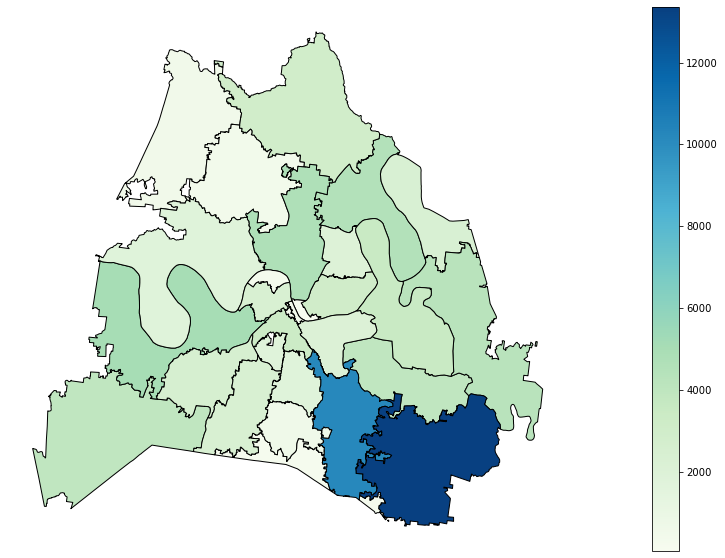

In [58]:
fig, ax = plt.subplots(figsize=(30,10))
covid_geo.plot(column = 'cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

#### Vaccine Map

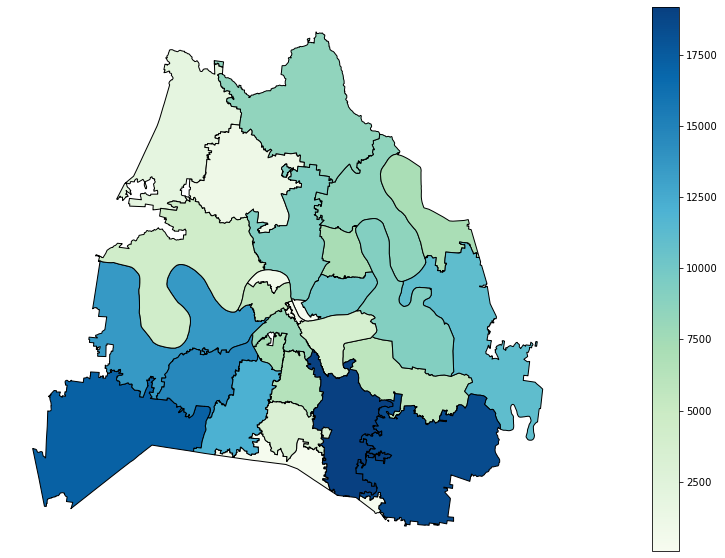

In [59]:
fig, ax = plt.subplots(figsize=(30,10))
vac_geo.plot(column = 'vacc',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

#### COVID AND Vaccine Map

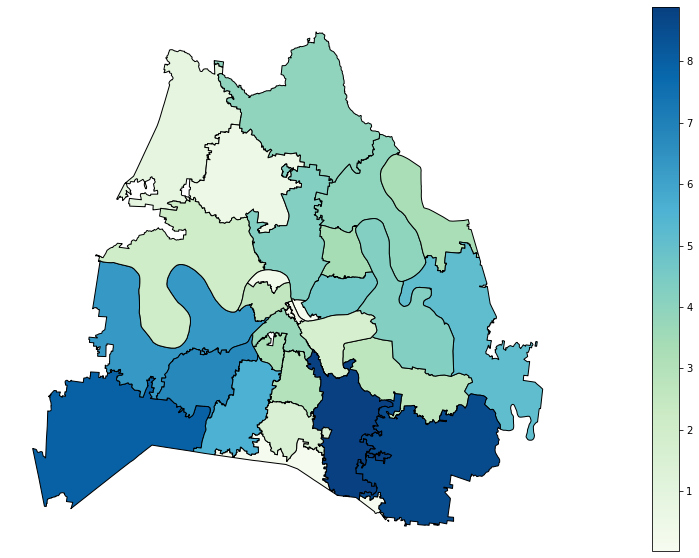

In [60]:
fig, ax = plt.subplots(figsize=(30,10))
c_v_geo.plot(column = 'perc_vacc',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

*** Explore sum in group by ***

In [61]:
covid_df_my = pd.to_datetime(covid_df_my.month_year)

NameError: name 'covid_df_my' is not defined

In [ ]:
# covid_df_my = covid_df_my.sort_values(['zip', 'month_year'])

In [ ]:
print(covid_df_my.head(20))

In [ ]:
# plt.scatterplt('')

In [ ]:
c_my_g.describe()

In [ ]:
plt.bar('month_year', 'cases', data = covid_df_my)
plt.ylim(0, 300)
plt.xticks(rotation = 70)
plt.title('');

In [ ]:
v_my_g.describe()

In [ ]:
c_my_g.describe()

In [ ]:
vaccine_df_by_zip = vaccine_df.groupby('zip')
covid_df_by_zip = covid_df.groupby('zip')

In [ ]:
vaccine_df_by_date = vaccine_df.groupby('date')
covid_df_by_zip_date = covid_df.groupby('date')

In [ ]:
vaccine_df_by_date['month'] = vaccine_df_by_date['date'].dt.month

In [ ]:
vaccine_df.info()

In [ ]:
covid_df_by_zip.describe()

In [ ]:
vaccine_df_by_date.describe()

### Reading Metadata function. From Joshua Rio-Ross
#### Basically, each table’s metadata.json is a dictionary with subdictionaries (as I’m sure you already saw), so I wrote a function that drills down to the right depth and gets each column name and stores it in a list in order, then finally it uses that list to rename the columns in the geodataframe/dataframe.
##### One important thing: The tablename is the Census Reporter name that you see in the top left part of the page and that’s at the beginning of all the column names. So it’s a string that’s something like “B09001” or whatever.

In [ ]:
def metarename(file, metadata, tablename):
    """Given a Census Reporter file and its metadata, rename all imported DataFrame columns."""
    name_list = ["geoid", "zip"]
    for i in metadata["tables"][tablename]["columns"].items():
        col_name = i[1]["name"]
        col_name_error = i[1]["name"]+" error"
        name_list.append(col_name)
        name_list.append(col_name_error)
    name_list.append("geometry")
    file.columns = name_list
    return file

# Read in GeoDataFrame from geojson
eth_geo_df = gpd.read_file('../data/ethnicity_geojson/ehtnicity_geo.geojson')
# Read in metadata DataFrame from json using json package
er_md = open('../data/ethnicity_geojson/metadata.json')
eth_race_meta = json.load(er_md)
# Run function using table name "B03002"
metarename(eth_geo_df, eth_race_meta, "B03002")